# Logistic Regression  - رگرسیون لجستیک 

    رگرسیون لجستیک یک روش آماری است که برای پیش‌بینی یک متغیر وابسته یا احتمال وقوع یک رویداد دودویی (بله/خیر، صحیح/غلط و غیره) استفاده می‌شود. معمولاً برای جواب دادن به سوالاتی مانند "آیا یک چیزی اتفاق می‌افتد یا نه؟" استفاده می‌شود. به عنوان مثال، اگر ما بخواهیم بدانیم آیا یک دارو موثر است یا نه، یا آیا یک شخص بیماری خاصی دارد یا نه، از رگرسیون لجستیک استفاده می‌کنیم. همچنین برای مسائلی مانند پیش‌بینی رفتارهای مشتریان یا تشخیص سرقت اعتباری نیز از آن استفاده می‌شود. در کل، وقتی که می‌خواهیم به یک سوال "بله" یا "خیر" جواب دهیم، احتمالاً از رگرسیون لجستیک استفاده خواهیم کرد.

     به‌طور کلی در رگرسیون لجستیک خروجی به‌شکل صفر یا ۱ است. زمانی‌که تعداد کلاس‌های خروجی ۲ باشد، به آن طبقه‌بندی باینری گفته می‌شود؛ البته تعداد کلاس‌های خروجی می‌تواند بیشتر هم باشد که در این صورت به آن طبقه‌بندی چندکلاسه یا مالتی کلاسی گفته می‌شود

> 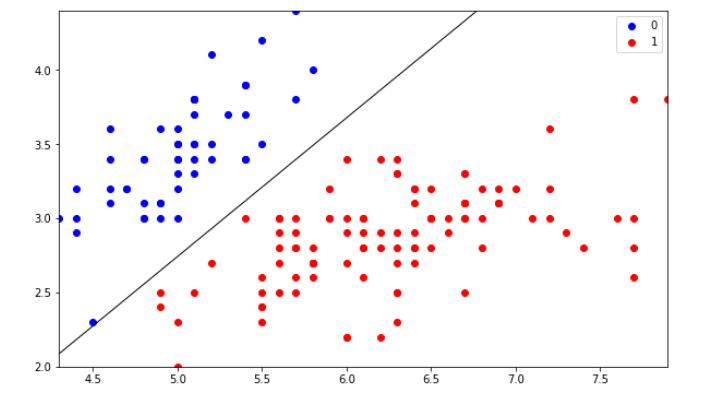

### ! در اینجا چند مثال واقعی از کاربردهای رگرسیون لجستیک به همراه انواع داده‌های مورد نیاز آورده شده است:


    ۱.  ارزیابی ریسک اعتبار 
       -  مثال: یک بانک می‌خواهد احتمال اینکه یک مشتری وام خود را پس ندهد بر اساس اطلاعات مالی آنها را ارزیابی کند.
    
       -  داده‌های مورد نیاز: داده‌های تاریخی مربوط به مشتریان شامل عواملی مانند درآمد، تاریخچه اعتبار، نسبت بدهی به درآمد و غیره، به همراه اطلاعاتی در مورد اینکه آیا آنها وام خود را پس نداده‌اند یا خیر.
    
    ۲.  تشخیص پزشکی 
       -  مثال : پیش‌بینی اینکه آیا یک بیمار برخی از شرایط خاص (مانند دیابت) را بر اساس تاریخچه پزشکی و نتایج آزمایشات آنها دارد یا خیر.
    
       - **داده‌های مورد نیاز: داده‌های مربوط به بیمار شامل علائم، تاریخچه پزشکی، نتایج آزمایش و غیره، به همراه اطلاعات مربوط به اینکه آیا آنها برخی از شرایط یا بیماری‌ها را دارند یا خیر.
    
    ۳.  تشخیص تقلب 
       -  مثال: پیش‌بینی اینکه آیا یک تراکنش کارت اعتباری تقلبی است یا خیر بر اساس ویژگی‌ها و الگوهای تقلبی پیشین.
      
       -  داده‌های مورد نیاز: داده‌های تراکنش شامل مبلغ تراکنش، مکان، زمان و غیره، به همراه اطلاعات مربوط به اینکه آیا تراکنش مورد بررسی تقلبی بوده یا نه.

### در این حالت می‌توان از یک تابع سیگموئید یا لجستیک استفاده کرد، زیرا این تابع همواره یک مقدار بین ۰ و ۱ برمی‌گرداند. معمولاً یک آستانه مانند ۰.۵ را تعیین می‌کنیم تا نتیجه را به بالا یا پایین گرد کنیم و خروجی را به یکی از دو کلاس تخصیص دهیم

    In PyTorch, the logistic function is implemented by the nn.Sigmoid() method

> 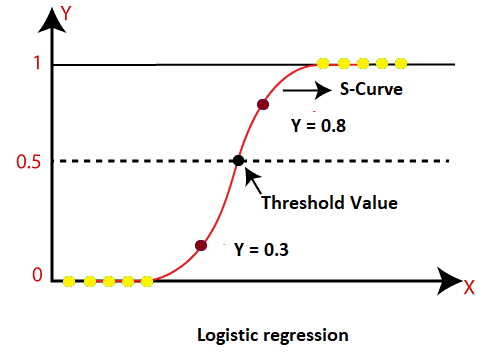



In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler # to scale features
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## How to build a model:
#### - design the model (input,output size, forward pass)
#### - construct loss and optimizer
#### - Training loop
>   - forward pass : compute predictions and loss
>   - backward pass: gradients
>   - update weights

# STEP 1 : Data prep

In [ ]:
# the breast cancer wisconsin dataset (classification).
breast_cancer_data = datasets.load_breast_cancer()

In [ ]:
breast_cancer_data

In [ ]:
breast_cancer_data.keys()

In [ ]:
X = breast_cancer_data.data 
y = breast_cancer_data.target

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2, random_state=1234)

In [ ]:
# scale
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
# reshape y
y_train = y_train.view(y_train.shape[0],1)
y_test  = y_test.view(y_test.shape[0],1)
y_test.shape

In [ ]:
y_train.shape

# STEP 2 : SETUP MODEL

#### 1 ->  linear model (Y = WX + B)

#### 2 ->  SIGMOID FUNCTION (logistic)


In [ ]:
class LogisticRegression(nn.Module):
    
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [ ]:
n_sample, n_features = X.shape
print(n_sample, n_features)

In [ ]:
model = LogisticRegression(n_features)
model  

In [ ]:
for name, param in model.named_parameters():
    print(name,param  )

# STEP 3 : LOSS AND OPTIMIZER

In [ ]:
criterion = nn.BCELoss() # binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(),lr=0.05) #Stochastic gradient descent

# STEP 4 : TRAINING LOOP


In [ ]:
num_epochs =800
for epoch in range(num_epochs):
    #forward pass and loss calculation
    y_predict = model(X_train)
    loss = criterion(y_predict,y_train)
    
    # backward pass
    loss.backward()
    
    # update weights
    optimizer.step()
    
    # zero gradient
    optimizer.zero_grad()
    
    if (epoch +1) % 30 ==0:
        print(f'epoch: {epoch+1} ,loss = {loss.item()}')
        
with torch.no_grad():
    y_predict = model(X_test)
    y_predict_class = y_predict.round()
    accuracy = y_predict_class.eq(y_test).sum()/float(y_test.shape[0])
    print(f'accuracy = {accuracy}')

In [ ]:
for name, param in model.named_parameters():
    print(name,param)
    print('-'*10)
    print(param.detach())
    print('-'*10)
    print(param.detach().numpy())
    print('-'*60)

In [ ]:
def model_plot(model, X, y, title):
    params = {}
    bias = []
    for name, param in model.named_parameters():
        params[name]=param.detach().numpy()  
    
    weight = params['linear.weight'][0]
    bias   = params['linear.bias'][0]
    
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-bias-weight[0]*u)/weight[1])
    
    plt.xlabel('x',fontsize=16) 
    plt.ylabel('y',fontsize=16)
    plt.title(title)
    plt.show()


# Train Data
model_plot(model, X_train, y_train, 'Train Data')

# Test Dataset Results
model_plot(model, X_test, y_test, 'Test Data')